# 2.1. Statistical Models: popular algorithms

Module: Artificial Intelligence for Aviation Engineering

Instructor: prof. Dmitry Pavlyuk

## Statistical model: popular algorithms

- k-nearest neighbours (KNN)
- linear regression (LR)
- support vector regression (SVR)
- decision tree (DT)
- random forest (RF)
- artificial neural network (ANN)

## Toy Example

Data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x_train = np.array(range(1,11))
y_train = np.array([2, 2, 4, 3, 5, 7, 7, 5, 9, 8])
data = pd.DataFrame({'x': x_train, 'y': y_train})
data.T

,0,1,2,3,4,5,6,7,8,9
x,1,2,3,4,5,6,7,8,9,10
y,2,2,4,3,5,7,7,5,9,8


## k-Nearest Neighbors

## k-Nearest Neighbors: Idea
In the previous topic, we discussed the 1-Nearest Neighbor model: __to predict a response for the observed predictor value, we use the responses of other observation most similar to it!__

Why to limit ourselved with one most similar case? Let's selected several (k) cases and average their values! The resulting model is called k-Nearest Neighbors (kNN) model.

To completely specify the kNN model, we need to define the hyperparameters:
- Number of similar cases (k)
- Similarity (or, oppositely, distance) metric

Selection of model parameter values is usually experimental.

## k-Nearest Neighbors: Number of neighbours (k)

In [2]:
from sklearn.neighbors import KNeighborsRegressor

x_test = pd.DataFrame(np.arange(1, 10, 0.1), columns=['x'])

knn_1 = KNeighborsRegressor(n_neighbors=1)
knn_1.fit(data[["x"]], data[["y"]])
y_pred_1 = knn_1.predict(x_test)

knn_2 = KNeighborsRegressor(n_neighbors=2)
knn_2.fit(data[["x"]], data[["y"]])
y_pred_2 = knn_2.predict(x_test)

knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(data[["x"]], data[["y"]])
y_pred_3 = knn_3.predict(x_test)

## k-Nearest Neighbors: Number of neighbours (k)

<Figure size 1000x600 with 0 Axes>

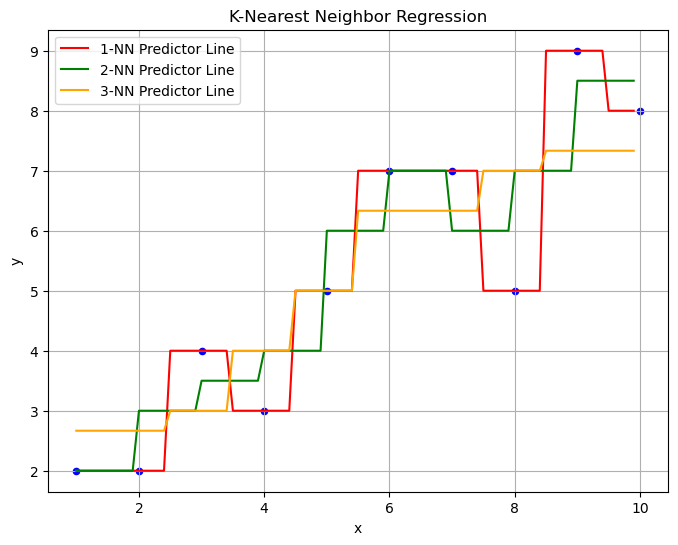

In [3]:
plt.figure(figsize=(10, 6))
data.plot(kind='scatter', x='x', y='y', color='b', figsize=(8, 6))
plt.plot(x_test, y_pred_1, color='r', label='1-NN Predictor Line')
plt.plot(x_test, y_pred_2, color='g', label='2-NN Predictor Line')
plt.plot(x_test, y_pred_3, color='orange', label='3-NN Predictor Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Nearest Neighbor Regression')
plt.legend()
plt.grid()
plt.show()

## k-Nearest Neighbors: Distance

In our simple example, we used the absolute value to measure the distance between the predictors in two different observations, $|x_i - x_j|$

When we have multiple predictors in each observation, we need a notion of distance between two sets of predictor values. e.g., Typically, we use Euclidean distance:

$$
distance(x_i, x_j) = \sqrt{(x_{i,1} - x_{j,1})^2 + (x_{i,2} - x_{j,2})^2 + \ldots + (x_{i,p} - x_{j,p})^2}
$$

__Caution 1__: When using Euclidean distance, the scale or units of measurement for the predictors are important! Predictors with larger values can disproportionately influence the distance calculation.

__Caution 2__: THe distance function should be appropriate for the predictor data type (e.g., numeric, ordinal, nominal, etc.)

## Linear regression

## Linear regression: idea


Note that in kNN model we did not compute a closed form for $\hat{f}$ our estimate of the function $f$ relating predictor to response.

Alternatively, if each observation has only one predictor, we can build a model by first assuming a simple form for $f$ (and hence $\hat{f}$, say a linear form:

$$
y = f(x) + \varepsilon = \beta_0 + \beta_1 x + \varepsilon
$$

Again, $\varepsilon$ is the random term by which observed values of __$y$__ differ from the rule __$f(x)$__.

## Linear regression: parameter estimation

For the satiistical model:

$$
y = f(x) + \varepsilon = \beta_0 + \beta_1 X + \varepsilon
$$

we need to construct an estimate:
$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1} x
$$

Intuition says to choose $\hat{\beta_0}$ and $\hat{\beta_1}$ in order to minimize the predictive errors made by our model:
$$
MSE(\hat{\beta_0}, \hat{\beta_1}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{\beta_0} - \hat{\beta_1} x_i)^2 → min
$$

As a result, we obtain popular Ordinary Least Squares (OLS) estimates of $\beta$:
$$
\hat{\beta}_{0,OLS}, \hat{\beta}_{1,OLS} = \arg\min_{\hat{\beta_0}, \hat{\beta_1}} MSE(\hat{\beta_0}, \hat{\beta_1})
$$

## Linear regression: illustration

<Figure size 800x600 with 0 Axes>

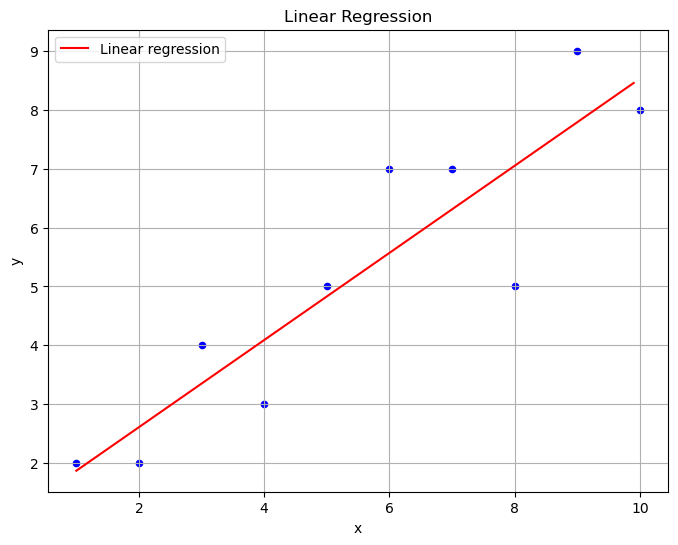

In [4]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(data[["x"]], data[["y"]])
x_test = pd.DataFrame(np.arange(1, 10, 0.1), columns=['x'])
y_pred = linear_model.predict(x_test)
plt.figure(figsize=(8, 6))
data.plot(kind='scatter', x='x', y='y', color='b', figsize=(8, 6))
plt.plot(x_test, y_pred, color='r', label='Linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.show();

## Linear regression: estimation results

In [5]:
import statsmodels.api as sm## Linear regression: illustration
ols_model = sm.OLS(data[["y"]], sm.add_constant(data[["x"]])).fit()
ols_model.summary()

C:\Users\dmitry\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     34.37
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           0.000377
Time:                        22:18:00   Log-Likelihood:                -14.432
No. Observations:                  10   AIC:                             32.86
Df Residuals:                       8   BIC:                             33.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1333      0.783      1.448      0.186      -0.671       2.938
x              0.7394      0.126      5.863      0.000       0.449       1.030
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   2.863
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.525
Skew:                          -0.461   Prob(JB):                        0.769
Kurtosis:                       2.359   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Support Vector Regression

## Support Vector Regression: Idea

What is it?
- Support Vector Regression (SVR) is a supervised learning algorithm that performs regression by finding a hyperplane within a defined margin of tolerance.

How does it work?

- Defines a region where errors are ignored (margin of tolerance). Predictions within this margin are considered acceptable.
- Only data points outside the margin influence the model
- Maps data to a higher-dimensional space (if needed) to model non-linear relationships (Kernel Trick)

## Support Vector Regression: illustration

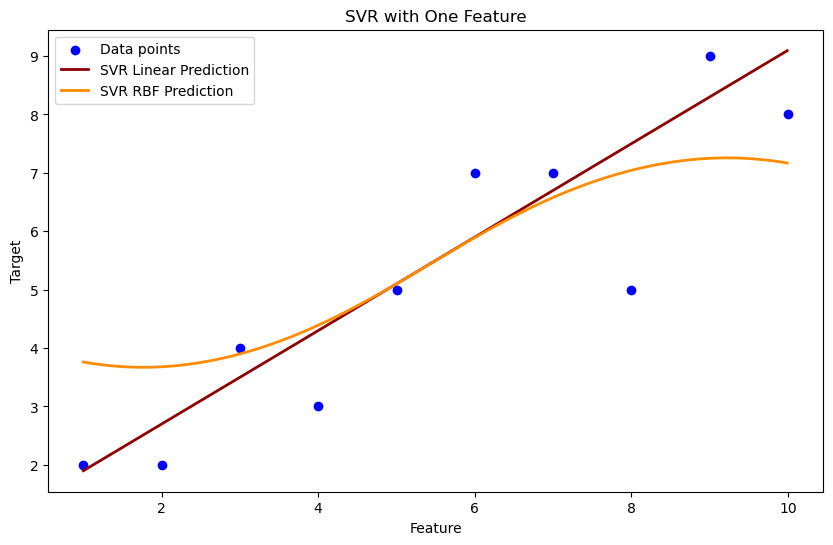

In [6]:
from sklearn.svm import SVR

svr_linear = SVR(kernel="linear")
svr_linear.fit(data[["x"]], data["y"])

svr_rbf = SVR(kernel="rbf")
svr_rbf.fit(data[["x"]], data["y"])

x_test = pd.DataFrame(np.arange(data["x"].min(), data["x"].max(), 0.01), columns=['x'])

plt.figure(figsize=(10, 6))## Linear regression: estimation results
plt.scatter(data[["x"]], data["y"], color="blue", label="Data points")
plt.plot(x_test, svr_linear.predict(x_test), color="darkred", linewidth=2, label="SVR Linear Prediction")
plt.plot(x_test, svr_rbf.predict(x_test), color="darkorange", linewidth=2, label="SVR RBF Prediction")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVR with One Feature")
plt.legend()
plt.show();

## Decision tree

## Decision tree: Idea

What is it?
- Decision Tree is a supervised learning algorithm that splits data into subsets based on feature values to make predictions

How does it work?
- Divides the dataset into subsets by finding the feature and threshold that best reduce impurity (e.g., Gini index, entropy, or mean squared error)
- Represent final predictions based on the subset of data reaching the node


## Decision tree: illustration

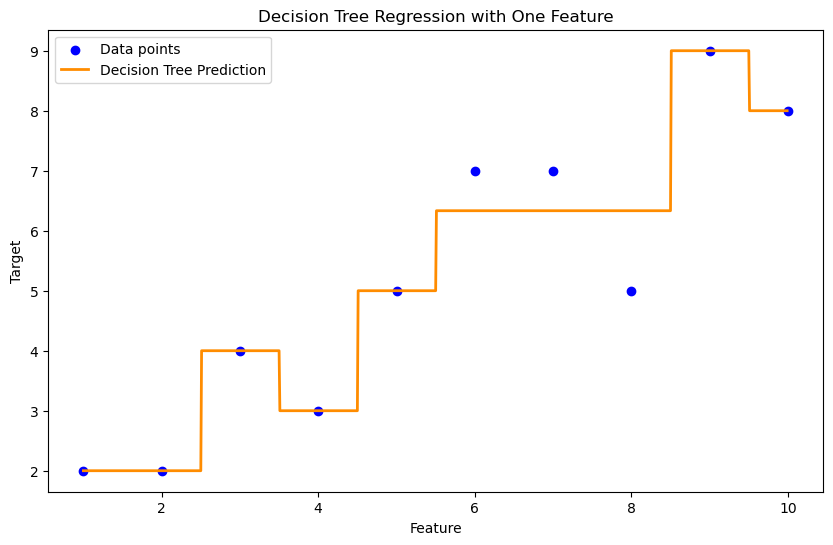

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data[["x"]], data["y"])
x_test = pd.DataFrame(np.arange(data["x"].min(), data["x"].max(), 0.01), columns=['x'])
y_pred = tree.predict(x_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data[["x"]], data["y"], color="blue", label="Data points")
plt.plot(x_test, y_pred, color="darkorange", linewidth=2, label="Decision Tree Prediction")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Decision Tree Regression with One Feature")
plt.legend()
plt.show();

## Decision tree: estimation results

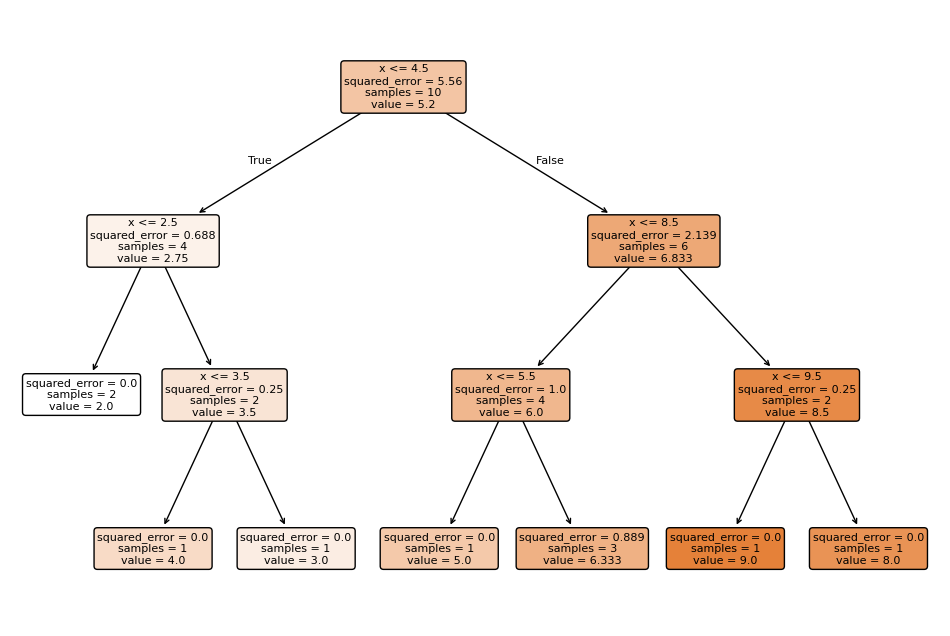

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=["x"], filled=True, rounded=True, fontsize=8);

## Other Popular Algorithms

## Random Forest

What is it?
- Random Forest is an ensemble learning algorithm that combines multiple decision trees to improve predictive performance and reduce overfitting.

How does it work?
- Multiple decision trees are trained on different random subsets of the data (bootstrap aggregation)
- At each split, a random subset of features is considered, increasing diversity among trees.
- Averaging. For regression, predictions are averaged.

## Multi-layered Perceptron (MLP)

What is it?
- Multi-Layer Perceptron (MLP) is a type of feedforward artificial neural network (ANN).


How does it work?

- Input Layer: Receives input features.
- Hidden Layers: Layers of interconnected neurons process inputs using weighted sums and activation functions (e.g., ReLU, sigmoid).
- Output Layer: Produces final predictions

## Boosting

What is it?
- XGBoost is a powerful, optimized gradient boosting framework designed for speed and performance

How does it work?
- Sequentially builds decision trees, where each tree corrects errors made by the previous ones (Boosting)
- Focuses more on incorrectly predicted samples by adjusting weights
- Regularization includes Lasso and Ridge penalties to prevent overfitting

# Thank you